<a href="https://colab.research.google.com/github/Saifullah785/Agentic_AI_LangGraph_Learning_Journey/blob/main/Sequential_Workflows_in_LangGraph/prompt_chaining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# %pip install langchain_openai

In [3]:
# %pip install langgraph

In [1]:
# Import necessary libraries for building the LangGraph application
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
# from dotenv import load_dotenv
# load_dotenv()

In [ ]:
# Initialize the HuggingFace model (commented out)
# llm = HuggingFaceEndpoint(
#     repo_id='meta-llama/Llama-3.1-8B-Instruct',
#     task="text-generation")
# model = ChatHuggingFace(llm=llm)

In [4]:
# Load the OpenAI API key from the secrets manager
from google.colab import userdata
OPENAI_API_KEY = userdata.get('OPENAI_API_KEY')

# Initialize the ChatOpenAI model
model = ChatOpenAI(openai_api_key=OPENAI_API_KEY)

In [5]:
# Define the state for the blog generation workflow
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [6]:
# Define the function to create the blog outline
def create_outline(state: BlogState) -> BlogState:

    title = state["title"]

    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    state["outline"] = outline
    return state

In [7]:
# Define the function to create the blog content
def create_blog(state: BlogState) -> BlogState:

    title = state["title"]
    outline = state["outline"]

    prompt = f"Write a detailed blog on the title - '{title}' Using the following outline:\n{outline}"
    content = model.invoke(prompt).content

    state["content"] = content
    return state

In [8]:
# Build the LangGraph workflow
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

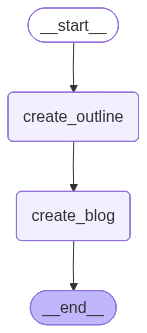

In [9]:
workflow

In [10]:
# Invoke the workflow with an initial state and print the final state
intial_state = {'title': 'Rise of AI in UK'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in UK', 'outline': 'I. Introduction\n    A. Definition of AI\n    B. Overview of AI technology\n    C. Importance of AI in daily life\n\nII. History of AI in the UK\n    A. Early developments in AI technology\n    B. Adoption of AI in various industries\n    C. Government initiatives in promoting AI research and development\n\nIII. Current state of AI in the UK\n    A. Growth of AI companies and startups\n    B. Impact of AI on the workforce\n    C. Ethical considerations regarding AI usage\n\nIV. Key applications of AI in the UK\n    A. Healthcare\n    B. Finance\n    C. Transportation\n    D. Retail\n    E. Education\n\nV. Challenges and opportunities in the rise of AI in the UK\n    A. Data privacy concerns\n    B. Skills gap in AI talent\n    C. Potential for economic growth\n    D. Risks of job displacement\n\nVI. Future outlook for AI in the UK\n    A. Predictions for AI advancements\n    B. Role of government in regulating AI technology\n    C. Potential be